In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 0. 데이터정리

In [3]:
#실거래가
real = pd.read_csv('./data/seoul_data.csv')
#세권
bank = pd.read_csv('./data/loc/bank.csv')
cafe = pd.read_csv('./data/loc/cafe.csv')
conv = pd.read_csv('./data/loc/convenience.csv')
daiso = pd.read_csv('./data/loc/daiso.csv')
depart = pd.read_csv('./data/loc/depart.csv')
hamb = pd.read_csv('./data/loc/hamburger.csv')
hospital = pd.read_csv('./data/loc/hospital.csv')
mart = pd.read_csv('./data/loc/mart.csv')
park = pd.read_csv('./data/loc/park.csv')
police = pd.read_csv('./data/loc/police.csv')
restaurant = pd.read_csv('./data/loc/restaurant.csv')
riverpark = pd.read_csv('./data/loc/riverpark.csv')
school = pd.read_csv('./data/loc/school.csv')
starbucks = pd.read_csv('./data/loc/starbucks.csv')
subway = pd.read_csv('./data/loc/subway.csv')
#고도
elev = pd.read_csv('./data/lat_lon_alti.csv')


In [4]:
tmp = pd.merge(real,bank,left_on='위치',right_on='0')
tmp = tmp.drop(labels='min_distance',axis=1)
tmp = tmp.drop(labels='500m_count',axis=1)
df = pd.DataFrame()
df['loc'] = tmp['위치']
df['area'] = tmp['면적']
df['m_rental'] = tmp['전월세']
df['y_price'] = tmp['보증금']
df['m_price'] = tmp['월세']
df['floor'] = tmp['층']
df['year'] = tmp['건축년도']
df['rowhouse'] = tmp['type']




In [7]:
def inputlist(list1, string_d, string_c):
    
    
    tmp1 = pd.merge(tmp,list1,left_on='위치',right_on='0')
    tmp_list_d = tmp1['min_distance']
    tmp_list_c = tmp1['500m_count']
   
    
    df[string_d] = tmp_list_d
    df[string_c] = tmp_list_c
inputlist(bank, 'bank_d', 'bank_c')
inputlist(cafe, 'cafe_d', 'cafe_c')
inputlist(conv, 'conv_d', 'conv_c')
inputlist(daiso, 'daiso_d', 'daiso_c')
inputlist(hamb, 'hamb_d', 'hamb_c')
inputlist(hospital, 'hosp_d', 'hosp_c')
inputlist(mart, 'mart_d', 'mart_c')
inputlist(park, 'park_d', 'park_c')
inputlist(police, 'police_d', 'police_c')
inputlist(restaurant, 'rest_d', 'rest_c')
inputlist(riverpark, 'rpark_d', 'rpark_c')
inputlist(school, 'sch_d', 'sch_c')
inputlist(starbucks, 'star_d', 'star_c')
inputlist(subway, 'sub_d', 'sub_c')

In [11]:
df['price'] = df['y_price'] + df['m_price']/4*1000


In [12]:
df2 = pd.read_csv('./data/final/data.csv')
df2.head(3)

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,price,predict_price
0,서울특별시 강남구 개포동 1163-4,13.56,1,3000.0,40.0,4,2013.0,0,13000.0,13168.940177
1,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,3,2013.0,0,16000.0,17222.952884
2,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,2,2013.0,0,16000.0,17071.711759


In [13]:
df['predict_price'] = df2['predict_price']

In [17]:
df.to_csv('./data/final_result.csv')

In [18]:
df.columns

Index(['loc', 'area', 'm_rental', 'y_price', 'm_price', 'floor', 'year',
       'rowhouse', 'bank_d', 'bank_c', 'cafe_d', 'cafe_c', 'conv_d', 'conv_c',
       'daiso_d', 'daiso_c', 'hamb_d', 'hamb_c', 'hosp_d', 'hosp_c', 'mart_d',
       'mart_c', 'park_d', 'park_c', 'police_d', 'police_c', 'rest_d',
       'rest_c', 'rpark_d', 'rpark_c', 'sch_d', 'sch_c', 'star_d', 'star_c',
       'sub_d', 'sub_c', 'price', 'predict_price'],
      dtype='object')

## 1. feature_importance

In [2]:
feature_importance = pd.read_csv('./data/final/feature_importance.csv')

In [60]:
feature_importance.head(50)

,col,importance
0,area,7222
1,year,6443
2,star_d,2416
3,m_rental_0,2063
4,alti,1945
5,conv_d,1792
6,hamb_d,1536
7,hosp_d,1500
8,mart_d,1494
9,sch_d,1493


<BarContainer object of 15 artists>

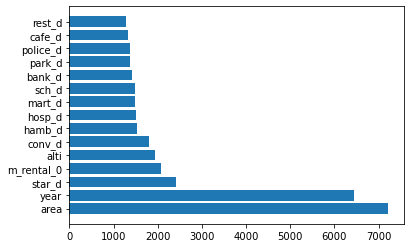

In [4]:
plt.barh(feature_importance['col'][:15], feature_importance['importance'][:15])

## 2. 가시화
#### data

In [5]:
df = pd.read_csv('./data/final/data.csv')

In [6]:
df.head(2)

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,price,predict_price
0,서울특별시 강남구 개포동 1163-4,13.56,1,3000.0,40.0,4,2013.0,0,13000.0,13237.262807
1,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,3,2013.0,0,16000.0,17258.043091


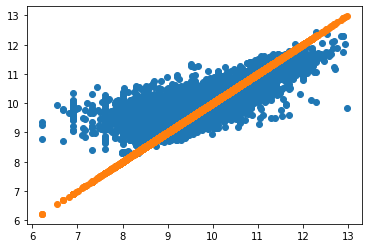

In [7]:
# 로그스케일
x_values = np.log1p(df['price'])
y_values_real = np.log1p(df['price'])
y_values_pred = np.log1p(df['predict_price'])
plt.scatter(x_values,y_values_pred)
plt.scatter(x_values,y_values_real)

plt.show()


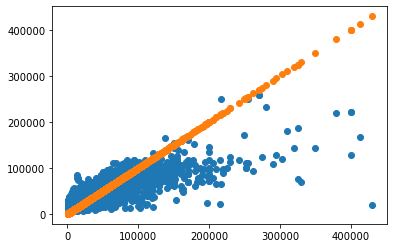

In [8]:
# 그냥 스케일
x_values = df['price']
y_values_real = df['price']
y_values_pred = df['predict_price']
plt.scatter(x_values,y_values_pred)
plt.scatter(x_values,y_values_real)

plt.show()


In [9]:
df_test = pd.read_csv('./data/final/data_test.csv')
df_test.head(2)

,area,year,bank_d,bank_c,cafe_d,cafe_c,conv_d,conv_c,daiso_d,daiso_c,...,dong_회현동2가,dong_효자동,dong_효제동,dong_효창동,dong_후암동,dong_휘경동,dong_흑석동,dong_흥인동,predict_price,real_price
0,0.147828,0.696970,0.880987,0.400000,0.612766,0.2,0.895035,0.666667,0.0,0.0,...,0,0,0,0,0,0,0,0,20395.738213,25500.0
1,0.064544,0.681818,0.846154,0.866667,0.611348,0.4,0.947518,1.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,12132.972393,13500.0


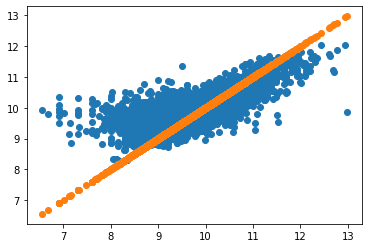

In [10]:

# 로그스케일
x_values = np.log1p(df_test['real_price'])
y_values_real = np.log1p(df_test['real_price'])
y_values_pred = np.log1p(df_test['predict_price'])
plt.scatter(x_values,y_values_pred)
plt.scatter(x_values,y_values_real)
plt.show()

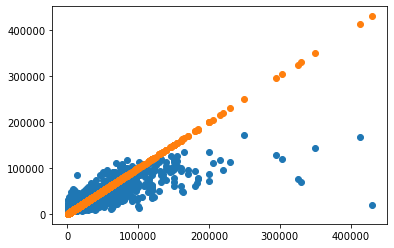

In [11]:
# 그냥 스케일
x_values = df_test['real_price']
y_values_real = df_test['real_price']
y_values_pred = df_test['predict_price']
plt.scatter(x_values,y_values_pred)
plt.scatter(x_values,y_values_real)
plt.show()

In [12]:
df

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,price,predict_price
0,서울특별시 강남구 개포동 1163-4,13.56,1,3000.0,40.0,4,2013.0,0,13000.0,13237.262807
1,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,3,2013.0,0,16000.0,17258.043091
2,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,2,2013.0,0,16000.0,17002.484510
3,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,5,2013.0,0,16000.0,17420.016069
4,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,4,2013.0,0,16000.0,17546.721373
...,...,...,...,...,...,...,...,...,...,...
165438,서울특별시 중랑구 중화동 208-4,22.21,0,10185.0,0.0,5,2012.0,1,10185.0,11272.971612
165439,서울특별시 중랑구 중화동 208-4,22.21,1,1000.0,45.0,3,2012.0,1,12250.0,12016.981941
165440,서울특별시 중랑구 중화동 208-4,22.21,1,1000.0,50.0,2,2012.0,1,13500.0,11852.345127
165441,서울특별시 중랑구 중화동 208-4,22.21,0,11500.0,0.0,6,2012.0,1,11500.0,11431.033382


In [40]:
diff_list = df['price'] - df['predict_price']

In [41]:
mean=np.mean(diff_list)
var=np.var(diff_list)
std=np.std(diff_list)

    

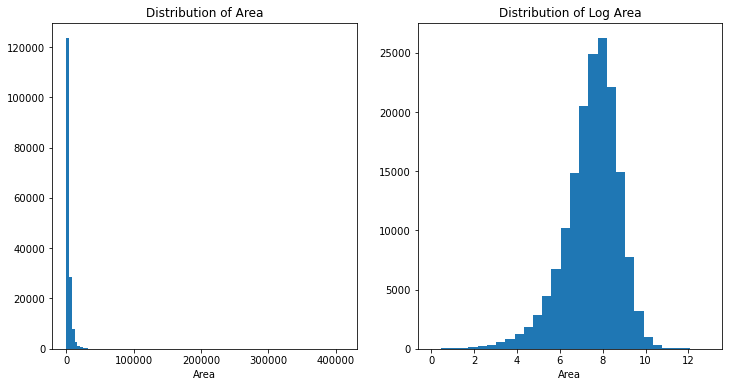

In [58]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.hist(abs(diff_list), bins=100)
ax1.set_title('Distribution of Area')
ax1.set_xlabel('Area')

ax2.hist(np.log1p(abs(diff_list)), bins=30)
ax2.set_title('Distribution of Log Area')
ax2.set_xlabel('Area')

plt.show()

In [43]:
diff_loglist = np.log1p(abs(diff_list))
mean=np.mean(diff_loglist)
var=np.var(diff_loglist)
std=np.std(diff_loglist)

print(mean, std)

7.486454890043562 1.2637942327143372


In [44]:
diff_loglist

0         5.473374
1         7.138107
2         6.911234
3         7.259127
4         7.344539
            ...   
165438    6.992989
165439    5.455398
165440    7.407715
165441    4.248018
165442    6.641187
Length: 165443, dtype: float64

In [18]:
df['z'] = (diff_loglist-mean)/std
df.head(10)

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,price,predict_price,z
0,서울특별시 강남구 개포동 1163-4,13.56,1,3000.0,40.0,4,2013.0,0,13000.0,13237.262807,-1.592886
1,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,3,2013.0,0,16000.0,17258.043091,-0.275636
2,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,2,2013.0,0,16000.0,17002.484510,-0.455154
3,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,5,2013.0,0,16000.0,17420.016069,-0.179877
4,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,4,2013.0,0,16000.0,17546.721373,-0.112293
5,서울특별시 강남구 개포동 1164-27,51.78,0,60000.0,0.0,6,2016.0,0,60000.0,40175.624200,1.905582
6,서울특별시 강남구 개포동 1164-27,51.78,0,60000.0,0.0,6,2016.0,0,60000.0,40175.624200,1.905582
7,서울특별시 강남구 개포동 1164-27,51.78,0,58000.0,0.0,4,2016.0,0,58000.0,38071.251394,1.909736
8,서울특별시 강남구 개포동 1164-27,51.78,0,58000.0,0.0,4,2016.0,0,58000.0,38071.251394,1.909736
9,서울특별시 강남구 개포동 1164-27,51.78,1,50000.0,6.0,4,2016.0,0,51500.0,25232.264154,2.128258


In [55]:
from scipy.stats import norm
def cdf2(z):
    if z < 0:
        return 0
    else:
        return np.round((norm.cdf(z)-0.5)*2,3)

cdf2(3.68)
df['cdf'] = list(map(cdf2, df['z']))


In [59]:
df.head(50)

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,price,predict_price,z,cdf
0,서울특별시 강남구 개포동 1163-4,13.56,1,3000.0,40.0,4,2013.0,0,13000.0,13237.262807,-1.592886,0.000
1,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,3,2013.0,0,16000.0,17258.043091,-0.275636,0.000
2,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,2,2013.0,0,16000.0,17002.484510,-0.455154,0.000
3,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,5,2013.0,0,16000.0,17420.016069,-0.179877,0.000
4,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,4,2013.0,0,16000.0,17546.721373,-0.112293,0.000
5,서울특별시 강남구 개포동 1164-27,51.78,0,60000.0,0.0,6,2016.0,0,60000.0,40175.624200,1.905582,0.943
6,서울특별시 강남구 개포동 1164-27,51.78,0,60000.0,0.0,6,2016.0,0,60000.0,40175.624200,1.905582,0.943
7,서울특별시 강남구 개포동 1164-27,51.78,0,58000.0,0.0,4,2016.0,0,58000.0,38071.251394,1.909736,0.944
8,서울특별시 강남구 개포동 1164-27,51.78,0,58000.0,0.0,4,2016.0,0,58000.0,38071.251394,1.909736,0.944
9,서울특별시 강남구 개포동 1164-27,51.78,1,50000.0,6.0,4,2016.0,0,51500.0,25232.264154,2.128258,0.967


In [25]:
df[df['loc'] == "서울특별시 관악구 봉천동 896-20"]

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,price,predict_price,z,cdf
134634,서울특별시 관악구 봉천동 896-20,17.99,0,20000.0,0.0,4,2020.0,1,20000.0,18905.693130,-0.385874,0.700
134635,서울특별시 관악구 봉천동 896-20,17.50,1,15000.0,30.0,2,2020.0,1,22500.0,16720.851379,0.930317,0.352
134636,서울특별시 관악구 봉천동 896-20,14.28,1,10000.0,30.0,10,2020.0,1,17500.0,16459.693470,-0.425879,0.670


In [47]:
# 해당 과거데이터

# 관악구 봉천동 896-20
# 현 매물가격 5평, 월세, 500/50
# https://www.zigbang.com/home/oneroom/items/31818595?updateFailedItemStatus=function(t)%7Bvar%20n%3Bif(t%7C%7C0%3D%3D%3Dt)%7Bvar%20r%3Dnull%3D%3D%3D(n%3De.sections)%7C%7Cvoid%200%3D%3D%3Dn%3Fvoid%200%3An.slice().map((function(e)%7Breturn%20e.data%7D)).filter((function(e)%7Breturn%20e.length%3E0%7D))%2Ci%3D(0%2Co.flatten)(r).find((function(e)%7Breturn%20e.item_id%3D%3D%3Dt%7D))%3Bi%26%26(i.status%3D!1%2Ce.updateItemState(i))%7D%7D
price_now = 1000/48*50+500
print("현재 매물의 가격 :", price_now)
print("과거 거래 가격   :", df['price'][134636])
print("적정 거래 가격   :", df['predict_price'][134636])
z_price = (np.log1p(abs(price_now - df['predict_price'][134636])))-mean/std
z_percent = np.round(abs(0.5-norm.cdf(z_price))*2,3)
print("현재 가격의 이상정도:", z_price)
print("현재 가격의 이상정도:", z_percent)

현재 매물의 가격 : 1541.6666666666665
과거 거래 가격   : 17500.0
적정 거래 가격   : 16459.693469949645
현재 가격의 이상정도: 3.686600070580507
현재 가격의 이상정도: 1.0


In [48]:
df[df['loc'] == "서울특별시 관악구 봉천동 881-31"]

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,price,predict_price,z,cdf
134821,서울특별시 관악구 봉천동 881-31,16.83,0,4500.0,0.0,2,2002.0,1,4500.0,9572.715930,0.827171,0.592
134822,서울특별시 관악구 봉천동 881-31,16.83,1,3000.0,20.0,2,2002.0,1,8000.0,11105.252216,0.438930,0.339
134823,서울특별시 관악구 봉천동 881-31,16.83,1,4000.0,20.0,3,2002.0,1,9000.0,11301.691608,0.202073,0.160
134824,서울특별시 관악구 봉천동 881-31,16.50,1,500.0,38.0,3,2002.0,1,10000.0,11267.110162,-0.269958,0.213
134825,서울특별시 관악구 봉천동 881-31,16.83,1,4000.0,20.0,3,2002.0,1,9000.0,11301.691608,0.202073,0.160
134826,서울특별시 관악구 봉천동 881-31,16.83,1,500.0,38.0,3,2002.0,1,10000.0,11301.691608,-0.248669,0.196
134827,서울특별시 관악구 봉천동 881-31,16.83,1,3000.0,25.0,4,2002.0,1,9250.0,11309.188533,0.114020,0.091
134828,서울특별시 관악구 봉천동 881-31,16.83,1,500.0,30.0,1,2002.0,1,8000.0,10511.171141,0.270968,0.214
134829,서울특별시 관악구 봉천동 881-31,16.83,1,2000.0,30.0,3,2002.0,1,9500.0,11301.691608,0.008373,0.007
134830,서울특별시 관악구 봉천동 881-31,16.83,1,1000.0,35.0,3,2002.0,1,9750.0,11301.691608,-0.109757,0.087


In [46]:
# 해당 과거데이터

# 관악구 봉천동 896-20
# 현 매물가격 5평, 월세, 500/50
# https://www.zigbang.com/home/oneroom/items/31818595?updateFailedItemStatus=function(t)%7Bvar%20n%3Bif(t%7C%7C0%3D%3D%3Dt)%7Bvar%20r%3Dnull%3D%3D%3D(n%3De.sections)%7C%7Cvoid%200%3D%3D%3Dn%3Fvoid%200%3An.slice().map((function(e)%7Breturn%20e.data%7D)).filter((function(e)%7Breturn%20e.length%3E0%7D))%2Ci%3D(0%2Co.flatten)(r).find((function(e)%7Breturn%20e.item_id%3D%3D%3Dt%7D))%3Bi%26%26(i.status%3D!1%2Ce.updateItemState(i))%7D%7D
price_now = 1000/48*50+500
print("현재 매물의 가격 :", price_now)
print("과거 거래 가격   :", df['price'][134636])
print("적정 거래 가격   :", df['predict_price'][134636])
z_price = (np.log1p(abs(price_now - df['predict_price'][134636])))-mean/std
z_percent = np.round(abs(0.5-norm.cdf(z_price))*2,3)
print("현재 가격의 이상정도:", z_price)
print("현재 가격의 이상정도:", z_percent)

14918.026803282979

In [2]:
df = pd.read_csv('./data/final/data.csv')

In [4]:
df['diff']=abs(df['price']-df['predict_price'])

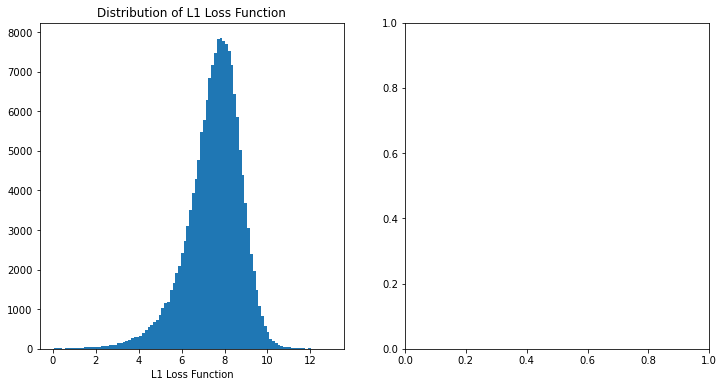

In [7]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.hist(np.log1p(df['diff']), bins=100)
ax1.set_title('Distribution of L1 Loss Function')
ax1.set_xlabel('L1 Loss Function')


plt.show()